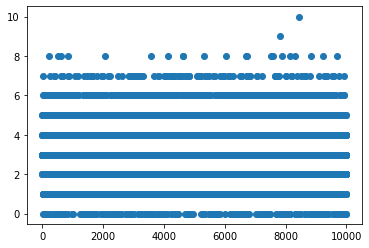

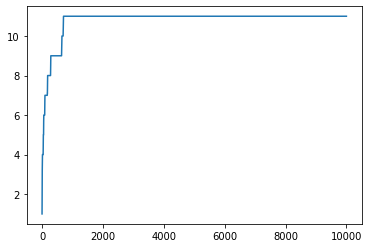

In [19]:
import numpy as np
import matplotlib.pyplot as plt

test = u'hello world!'
len_population = 10

history_col_mutants = []
history_obj_func    = []
history_epochs      = []

def objective_function ( finded_string, target_string = test ):
    score = 0
    count = 0
    for letter in target_string:
        if letter == finded_string[count]:
            score += 1
        count = count+1
    return score    

def init_population ( len_chromosome=len(test), count_chromosomes=len_population ):
    sum_scores = 0
    new_chromosomes = []
    while( True ):
        new_chromosome = ''
        for gene in range( 0, len_chromosome ):
            new_chromosome+=chr( np.random.randint(31, 123) )
        
        if objective_function( new_chromosome ):
            new_chromosomes.append( new_chromosome )
        
        if count_chromosomes == len( new_chromosomes ):
            break
    
    return new_chromosomes 

def calculate_score ( chromosomes ):
    sum_score = 0
    for chromosome in chromosomes:
        sum_score+=objective_function ( chromosome )
    return sum_score

def operator_roulette ( chromosomes=[] ):
    
    rotation_roulette    = []
    selected_chromosomes = []
    score_chromosomes    = []
    
    sum_scores = calculate_score ( chromosomes )
    prev_score  = 0
    rotation_roulette = np.random.randint( 1, 10, size=len(chromosomes) )/10.0
    
    for chromosome in chromosomes:
        score_chromosomes.append( objective_function( chromosome ) )
    
    history_obj_func.append( round( sum( score_chromosomes )/len( chromosomes ), 2 ) )
    roulette_sector = []
    for chromosome, score in zip( chromosomes, score_chromosomes ):
        roulette_sector.append( (np.round(prev_score, 2), np.round((score/sum_scores)+prev_score, 2)) )
        prev_score += np.float( score/sum_scores )
    
    
    for chromosome, score_chromosome in zip( chromosomes, roulette_sector ):
        for selected_sector in rotation_roulette:
            if score_chromosome[0] < selected_sector <= score_chromosome[1]:
                selected_chromosomes.append(chromosome)

    return selected_chromosomes 

def operator_crossingover ( population ):
    
    len_population   = len( population )
    slice_population = int( len_population/2 )
    new_population = []

    for husband, wife in zip( population[:slice_population], population[slice_population:len_population] ):
        children1 = []
        children2 = []
        crossing  = np.random.randint(1, len(husband))
        children1 = husband[:crossing]+wife[crossing:]
        new_population.append(children1)
        children2 = wife[:crossing]+husband[crossing:] 
        new_population.append(children2)
    return new_population


def operator_mutation ( chromosomes ):
    new_chromosomes=[]
    count_mutants = 0
    for chromosome in chromosomes:
        if np.random.randint( 0,  100 ) <=30:
            count_mutants+=1
            len_cromosome = len(chromosome) 
            crossing      = np.random.randint( 0,  len_cromosome )
            mutation_gen  = chr( np.random.randint(31, 123) ) #97-123
            if crossing:
                chromosome = chromosome[:crossing-1]+mutation_gen+chromosome[crossing:len_cromosome]
            else:
                chromosome = mutation_gen+chromosome[crossing+1:len_cromosome]
                    
            new_chromosomes.append( chromosome )     
        else:
            new_chromosomes.append( chromosome )
    #history_col_mutants.append( round( count_mutants / len( chromosomes ), 2) )
    history_col_mutants.append( count_mutants )
    return new_chromosomes

def operator_selection( chromosomes ):
    result          = []
    new_chromosomes = []
    score           = 0
    for chromosome in chromosomes:
        score = objective_function( chromosome ) 
        new_chromosomes.append((score, chromosome))
    new_chromosomes = sorted( new_chromosomes, reverse=True )    
    for key, val in new_chromosomes:
        result.append(val)    
    return result[:int(len(chromosomes)/2)]

new = []
old = []
t = init_population()

for epoch in range(1, 10000):
    new = t 
    t = operator_roulette( t )
    t = operator_crossingover( t )
    t = operator_mutation( t )
    old = t+new
    t = operator_selection( old )
    history_epochs.append( epoch )
    if test in t:
        print('Epoch # %d'% epoch)
        print( t )
        break

plt.scatter(history_epochs, history_col_mutants)
plt.show()
plt.plot(history_epochs, history_obj_func) 
plt.show()